<a href="https://colab.research.google.com/github/mohansameer1983/NLP/blob/main/MMAI_2022_891_Individual_Assignment_Solution.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# MMAI 891: Individual Assignment

Version 1: Updated February 9, 2022

<font color='red'>\# TODO: fill in the below</font>

- [Sameer, Mohan]
- [20309780]
- [Section 1]
- [Greenlight]
- [22-04-2022]

# Assignment Instructions

This assignment contains one (1) question with multiple parts and one (1) optional question for bonus marks. The questions and parts are wholly contained in this Google Colab Notebook. 

You are to make a copy of this Notebook and edit the copy to provide your answers/solutions. You are to complete the assignment entirely within Google Colab. Why?

- It gives you practice using cloud-based interactive notebook environments (which is a popular workflow)
- It is easier for you to manage the environment (e.g., installing packages, etc.)
- Google Colab has nice, beefy machines, so you don't have to worry about running out of memory on your local computer.
- It will be easier for the TA to help you debug your code if you need help
- It will be easier for the TA to mark/run your code

## Questions

Each question has multiple tasks. There are two possible types of tasks: tasks that require you to write code and tasks that require you to write text responses. A grading rubric is provided on D2L for each question.

For tasks that require **code**:
- Use Python to complete the task.
- You may use standard Python libraries, including scikit-learn, pandas, and numpy.
- Tips:
  - Submit code that runs without errors.
  - Submit code that is reproducible. E.g., set random number seeds as appropriate. You should be able to run your code again and again and again, from the top of the file to the bottom of the file, and get the exact same results each time. I should be able to run your code, from scratch, again and again, and get the exact same results that you get.
  - Submit code that is organized. Make your code readable. Provide comments to describe what the code is doing and why. Don’t leave “old” code lying around. Overall, if your code is clear and easy to read, then we will be happy. When we are happy, we give better marks.

For tasks that require **text responses**:
- Type your response in Notebook cell indicated.
- Use English. Use proper grammar, spelling, and punctuation. Be professional and clear. Be complete, but not overly verbose.
- Feel free to use [Markdown syntax](https://www.markdownguide.org/basic-syntax/) to format your answer (i.e., add bold, italics, lists, tables).
- You may refer to your code in your answer. Please do so very clearly. E.g., “As can be seen in on line X above …“


## What to Submit to the Course Portal

- You are to export your completed Notebook as a PDF file by clicking File->Print->Save as PDF.
- Please do not submit the Notebook (.ipynb) file to the course portal. 
- Please submit the PDF export of the Notebook. 
   - Please name the PDF file 21_891_FirstnameLastName.pdf
      - E.g., *21_891_StephenThomas.pdf*
   - Please make sure you have run all the cells so we can see the output!
   - Best practice: Before exporting to PDF, click Runtime->Restart and run all.



# Preliminaries: Inspect and Set up environment

In [233]:
!pip install -q transformers tfds-nightly
!pip install unidecode
!pip install Lime

In [234]:
import datetime
import pandas as pd
import numpy as np
import unidecode
import nltk
from nltk.corpus import stopwords  
nltk.download('stopwords')
nltk.download('wordnet')
from bs4 import BeautifulSoup
from nltk.stem import WordNetLemmatizer
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.tree import DecisionTreeClassifier
from sklearn.pipeline import Pipeline
from sklearn.metrics import confusion_matrix, classification_report,accuracy_score
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
import re
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import MultinomialNB
# matplotlib
import matplotlib.pyplot as plt
plt.style.use('seaborn')

try: # this is only working on the 2nd try in colab :)
  from transformers import DistilBertTokenizer, TFDistilBertModel, DistilBertConfig, AutoTokenizer, AutoModel, AutoConfig
except Exception as err: # so we catch the error and import it again
  from transformers import DistilBertTokenizer, TFDistilBertModel, DistilBertConfig, AutoTokenizer, AutoModel, AutoConfig

import tensorflow as tf
import numpy as np
import tensorflow.keras as keras
from tensorflow.keras.layers import Dense, Input, Dropout, Flatten
import lime
from lime import lime_text
from sklearn.pipeline import make_pipeline
from lime.lime_text import LimeTextExplainer

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [172]:
print(datetime.datetime.now())

2022-04-30 00:37:17.677547


In [173]:
!which python

/usr/local/bin/python


In [174]:
!python --version

Python 3.7.13


In [175]:
!echo $PYTHONPATH

/env/python


# Question 1: Sentiment Analysis via Shallow ML


**Marking**

The coding parts (i.e., 1.a, 1.b, 1.c4) will be marked based on:

- *Correctness*. Code clearly and fully performs the task specified.
- *Reproducibility*. Code is fully reproducible. I.e., you (and I) are able to run this Notebook again and again, from top to bottom, and get the same results each time.
- *Style*. Code is organized. All parts commented with clear reasoning and rationale. No old code laying around. Code easy to follow.


Parts 2 and 3 will be marked on:

- *Quality*. Response is well-justified and convincing. Responses uses facts and data where possible.
- *Style*. Response uses proper grammar, spelling, and punctuation. Response is clear and professional. Response is complete, but not overly-verbose. Response follows length guidelines.


In [176]:
# DO NOT MODIFY THIS CELL

# First, we'll read the provided labeled training data
df = pd.read_csv("https://drive.google.com/uc?export=download&id=1b8MAiN-xBdk6scM-DnufkuijDZivZJqM")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2400 entries, 0 to 2399
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Sentence  2400 non-null   object
 1   Polarity  2400 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 37.6+ KB


In [177]:
df.head()

,Sentence,Polarity
0,Wow... Loved this place.,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
3,Stopped by during the late May bank holiday of...,1
4,The selection on the menu was great and so wer...,1


In [178]:
# DO NOT MODIFY THIS CELL

# Next, we'll split it into training and test
from sklearn.model_selection import train_test_split

X = df['Sentence']
y = df['Polarity']

# So that we can evaluate how well our model is performing, we split our training data
# into training and validation.

X_train, X_val, y_train, y_val = train_test_split(X, y, random_state=42)

## Part 1.a: Preprocessing and FE Pipeline

Clean and preprocess the data (i.e., `X_train`) as you see necessary. Extract features from the text (i.e., vectorization using BOW and/or Bag of N-Grams and/or topics and/or lexical features). 


In [179]:
stop_words = stopwords.words('english') 
lemmer = WordNetLemmatizer()

def preprocess(x):
    # Remove HTML tags
    x = BeautifulSoup(x, "lxml").get_text()

    # Lower case
    x = x.lower()
    
    # Remove punctuation
    x = re.sub(r'[^\w\s]', '', x)
    
    # Remove non-unicode
    x = unidecode.unidecode(x)
    
    # Remove numbers
    x = re.sub(r'\d+', '', x)
    
    # Remove stopwords and lemmatize
    x = [lemmer.lemmatize(w) for w in x.split() if w not in stop_words]
    return ' '.join(x) 

%time X_train_Clean = X_train.apply(preprocess)
%time X_val_Clean = X_val.apply(preprocess)

CPU times: user 552 ms, sys: 14.7 ms, total: 567 ms
Wall time: 581 ms
CPU times: user 138 ms, sys: 2.94 ms, total: 141 ms
Wall time: 140 ms


**Note** - On multiple trials for cleaning data, it actually reduced the overall accuracy. So, in below code, will avoid using cleaned data.

In [180]:
vectorizer = TfidfVectorizer()
#vectorizer = TfidfVectorizer(max_features = None, ngram_range=[1,4], min_df = 1, max_df = 1)


**Note** - Using different hyperparameters for TfidVec doesn't help either. So, using plain vanilla and it got the best accuracy.

## Part 1.b: Model Training/Tuning/Cross Validation

Use your favorite shallow ML algorithm (such as decision trees, KNN, random forest, boosting variants) to train a classification model.  Don’t forget everything we’ve learned in the machine learning course: hyperparameter tuning, cross-validation, handling imbalanced data, etc. Make reasonable decisions and try to create the best-performing model that you can.


###Random Forest Model

In [181]:
pipe = Pipeline([('vec', vectorizer),  ('clf', RandomForestClassifier(random_state=223))])

pipe.fit(X_train, y_train)

pred_val = pipe.predict(X_val)

In [182]:
print(classification_report(y_val, pred_val))

              precision    recall  f1-score   support

           0       0.81      0.79      0.80       323
           1       0.76      0.78      0.77       277

    accuracy                           0.79       600
   macro avg       0.79      0.79      0.79       600
weighted avg       0.79      0.79      0.79       600



###XGBoost Model

In [183]:
pipe_xgb = Pipeline([('vec', vectorizer),  ('xgb', XGBClassifier(random_state=223))])

pipe_xgb.fit(X_train, y_train)

pred_val_xgb = pipe_xgb.predict(X_val)
print(classification_report(y_val, pred_val_xgb))

              precision    recall  f1-score   support

           0       0.75      0.84      0.79       323
           1       0.79      0.68      0.73       277

    accuracy                           0.77       600
   macro avg       0.77      0.76      0.76       600
weighted avg       0.77      0.77      0.76       600



###Naive Bayes Model

In [211]:
pipe_nb = Pipeline([('vec', vectorizer),  ('nb', MultinomialNB())])

pipe_nb.fit(X_train, y_train)

pred_val_nb = pipe_nb.predict(X_val)
print(classification_report(y_val, pred_val_nb))


              precision    recall  f1-score   support

           0       0.82      0.84      0.83       323
           1       0.80      0.79      0.80       277

    accuracy                           0.81       600
   macro avg       0.81      0.81      0.81       600
weighted avg       0.81      0.81      0.81       600



###Linear SVC Model

In [185]:
X_train.shape

(1800,)

In [186]:
# Create Pipeline and Fit model
pipe_lsvc = Pipeline([('vec', vectorizer),  
                    ('ls', LinearSVC())])

pipe_lsvc.fit(X_train, y_train)

pred_val_lsvc = pipe_lsvc.predict(X_val)
print(classification_report(y_val, pred_val_lsvc))

              precision    recall  f1-score   support

           0       0.84      0.87      0.85       323
           1       0.84      0.81      0.83       277

    accuracy                           0.84       600
   macro avg       0.84      0.84      0.84       600
weighted avg       0.84      0.84      0.84       600



## Part 1.c: Model Assessment 

Use your model to predict the sentiment of the testing data. Measure the performance (e.g., accuracy, AUC, F1-score) of your model. 

In [187]:
# DO NOT MODIFY THIS CELL

test_df = pd.read_csv("https://drive.google.com/uc?export=download&id=1taoTluPBUMt9JkKAnlqDTrU49DJFpJGW")
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Sentence  600 non-null    object
 1   Polarity  600 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 9.5+ KB


In [188]:
#Will not use cleaned test data, due to low accuracy
%time test_df['Sentence_clean'] = test_df['Sentence'].apply(preprocess)
y_test = test_df['Polarity']

CPU times: user 272 ms, sys: 1.77 ms, total: 274 ms
Wall time: 402 ms


###XGBoost Test

In [189]:
pred_test_xgb = pipe_xgb.predict(test_df['Sentence'])

pred_test_prob_xgb = pipe_xgb.predict_proba(test_df['Sentence'])
print(classification_report(y_test, pred_test_xgb))

              precision    recall  f1-score   support

           0       0.59      0.83      0.69       287
           1       0.75      0.46      0.57       313

    accuracy                           0.64       600
   macro avg       0.67      0.65      0.63       600
weighted avg       0.67      0.64      0.63       600



###Random Forest Test

In [190]:
pred_test = pipe.predict(test_df['Sentence'])

pred_test_prob = pipe.predict_proba(test_df['Sentence'])

In [191]:
print(classification_report(y_test, pred_test))
fpr, tpr, thresh = roc_curve(y_test, pred_test_prob[:,1], pos_label=1)

# roc curve for tpr = fpr 
random_probs = [0 for i in range(len(y_test))]
p_fpr, p_tpr, _ = roc_curve(y_test, random_probs, pos_label=1)

auc_score = roc_auc_score(y_test, pred_test_prob[:,1])

print('auc_score_test:',auc_score)
print('accuracy %s' % accuracy_score(pred_test, y_test))

              precision    recall  f1-score   support

           0       0.64      0.82      0.72       287
           1       0.78      0.58      0.67       313

    accuracy                           0.69       600
   macro avg       0.71      0.70      0.69       600
weighted avg       0.71      0.69      0.69       600

auc_score_test: 0.7731128452316016
accuracy 0.695


###Naive Bayes Test

In [212]:
pred_test_nb = pipe_nb.predict(test_df['Sentence'])

pred_test_prob_nb = pipe_nb.predict_proba(test_df['Sentence'])
print(classification_report(y_test, pred_test_nb))

              precision    recall  f1-score   support

           0       0.72      0.85      0.78       287
           1       0.84      0.70      0.77       313

    accuracy                           0.78       600
   macro avg       0.78      0.78      0.77       600
weighted avg       0.78      0.78      0.77       600



###Linear SVC Test

In [193]:
pred_test_lsvc = pipe_lsvc.predict(test_df['Sentence'])

print(classification_report(y_test, pred_test_lsvc))

              precision    recall  f1-score   support

           0       0.72      0.79      0.76       287
           1       0.79      0.72      0.76       313

    accuracy                           0.76       600
   macro avg       0.76      0.76      0.76       600
weighted avg       0.76      0.76      0.76       600



## Part 2: Given the performance of your model, are you satisfied with the results? Explain.

Keep your response to 1000 characters or less.

Given that we are using shallow ML for classification, in my opinion we got good accuracy score. We have tried cleaning data, TfIdfVec hyper parameter tuning etc. In the end, models performed better without those steps. So, I can say I am satisfied with the steps tried in this problem.


*   Best Model - Naive Bayes - 78% Accuracy
*   No preprocessing of data needed
*   No hyperparameter tuning worked for TfIdfVec or for models we have tried, which could improve the score.



## Part 3: Show five test instances in which your model was incorrect. Dive deep and find out why your model was wrong.

Keep your response to 1000 characters or less.

In [213]:
for idx, prediction, label in zip(enumerate(test_df['Sentence']), pred_test_nb, y_test):
    if prediction != label:
        print("Sample", idx, ', has been classified as', prediction, 'and should be', label) 

Sample (3, "It's a feel-good film and that's how I felt when I came out of the cinema!  ") , has been classified as 0 and should be 1
Sample (12, 'Not too screamy not to masculine but just right.  ') , has been classified as 0 and should be 1
Sample (14, 'I would have casted her in that role after ready the script.  ') , has been classified as 0 and should be 1
Sample (26, 'I wish I could enter negative values, admins?  ') , has been classified as 1 and should be 0
Sample (34, '1/10 - and only because there is no setting for 0/10.  ') , has been classified as 1 and should be 0
Sample (36, "The soundtrack wasn't terrible, either.  ") , has been classified as 0 and should be 1
Sample (38, 'Still, it was the SETS that got a big "10" on my "oy-vey" scale.  ') , has been classified as 0 and should be 1
Sample (39, 'Yes, I am simplifying things here for the sake of brevity, for this really is at the core of the problems with this film - it has too much going on without any real, fulfilling e

##Explanation
Let's analyze following sentences which got wrongly predicted.
1. **394** - 'Predictable, but not a bad watch.'  **[Pred-0;Actual-1]**
2. **377** - 'The film has an ultra-cheap look to it.' **[Pred-1;Actual-0]**
3. **211** - 'I believe that Pitch Black was done well.' **[Pred-0;Actual-1] **
4.  **92** - 'But this movie really got to me.'  **[Pred-0;Actual-1]** 
5.  **12** - 'Not too screamy not to masculine but just right.'  **[Pred-0;Actual-1]**

To explain which words contributed into prediction for sentence, we will use Lime library. This will show how our model behaving around the words in sentence, hence predicting the way it is.



In [ ]:
#Initialize 
test_vectors = vectorizer.transform(test_df.Sentence)
class_names=['Negative','Postive']
explainer = LimeTextExplainer(class_names=class_names)

Document id: 394
Probability Distribution: [Negative Postive]: [[0.92051611 0.07948389]]
Probability(Positive) = 0.07948388983306906
True class: Postive
[('bad', -0.15210615785793577), ('not', -0.06759515242137619), ('watch', 0.03582295127497958), ('Predictable', -0.030396661871006894), ('but', -0.017256899155833966), ('a', -0.0032842816043386906)]


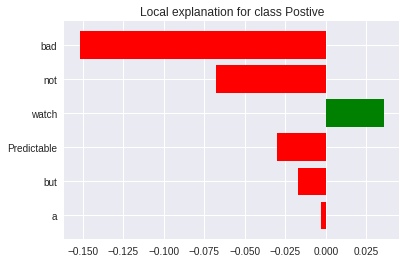

In [247]:
###  Sentence-1 --> 'Predictable, but not a bad watch.' [Pred-0;Actual-1]  ####

idx=394

#We are using top 6 features from document, which impacted the model prediction 
exp = explainer.explain_instance(test_df.Sentence[idx], pipe_nb.predict_proba, num_features=6)
print('Document id: %d' % idx)
print('Probability Distribution: [Negative Postive]:',pipe_nb.predict_proba([test_df.Sentence[idx]]))
print('Probability(Positive) =', pipe_nb.predict_proba([test_df.Sentence[idx]])[0,1])
print('True class: %s' % class_names[test_df.Polarity[idx]])
print(exp.as_list())
%matplotlib inline
fig = exp.as_pyplot_figure()

###
#  *** Conclusion *** - Explanation generated below shows, model predicted this sentence as 'negative'. This is due to the weightage given to words like 'bad','not'.
###

Document id: 377
Probability Distribution: [Negative Postive]: [[0.47393828 0.52606172]]
Probability(Positive) = 0.5260617179521474
True class: Negative
[('cheap', -0.16644840814323833), ('has', 0.06975730098098311), ('look', 0.06704494364269598), ('an', 0.040050356018806875), ('film', 0.016107174890182378), ('to', -0.012734797425341376)]


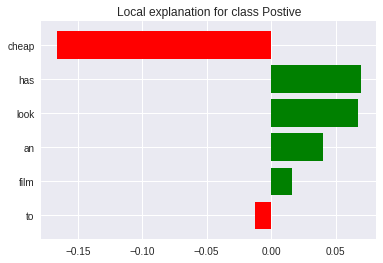

In [248]:
###  Sentence-2 --> 'The film has an ultra-cheap look to it.' [Pred-1;Actual-0]  ####

idx=377

#We are using top 6 features from document, which impacted the model prediction 
exp = explainer.explain_instance(test_df.Sentence[idx], pipe_nb.predict_proba, num_features=6)
print('Document id: %d' % idx)
print('Probability Distribution: [Negative Postive]:',pipe_nb.predict_proba([test_df.Sentence[idx]]))
print('Probability(Positive) =', pipe_nb.predict_proba([test_df.Sentence[idx]])[0,1])
print('True class: %s' % class_names[test_df.Polarity[idx]])
print(exp.as_list())
%matplotlib inline
fig = exp.as_pyplot_figure()

###
#  *** Conclusion *** - Explanation generated below shows, model predicted this sentence as 'positive'. But its almost edge case. 
#                       Model considered words like 'has', 'an' as positive, which are stop words. We have not cleaned the test data, 
#                        and this is the reason for sentence to be classified as 'Positive'.
###

Document id: 211
Probability Distribution: [Negative Postive]: [[0.50860705 0.49139295]]
Probability(Positive) = 0.49139294961103763
True class: Postive
[('believe', -0.12584985202674484), ('well', 0.10843209924570611), ('done', 0.06924484624150064), ('that', -0.03121805911657938), ('Black', -0.024418036899560305), ('was', -0.00977751035193135)]


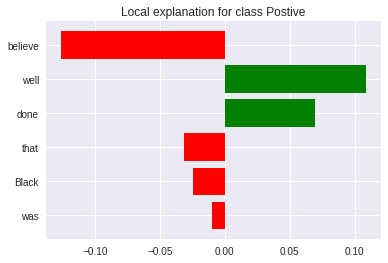

In [249]:
###  Sentence-3 --> 'I believe that Pitch Black was done well.' [Pred-0;Actual-1]  ####

idx=211

#We are using top 6 features from document, which impacted the model prediction 
exp = explainer.explain_instance(test_df.Sentence[idx], pipe_nb.predict_proba, num_features=6)
print('Document id: %d' % idx)
print('Probability Distribution: [Negative Postive]:',pipe_nb.predict_proba([test_df.Sentence[idx]]))
print('Probability(Positive) =', pipe_nb.predict_proba([test_df.Sentence[idx]])[0,1])
print('True class: %s' % class_names[test_df.Polarity[idx]])
print(exp.as_list())
%matplotlib inline
fig = exp.as_pyplot_figure()

###
#  *** Conclusion *** - Explanation generated below shows, model predicted this sentence as 'negaive'. But again its edge case. 
#                       Model considered word 'believe' as negative, which shows it learns it as something where it comes with negative feeling.
#                       Again, stop words 'that', 'was' contributed negatively. If we remove those, it may help model predictions.
###

Document id: 92
Probability Distribution: [Negative Postive]: [[0.69734343 0.30265657]]
Probability(Positive) = 0.3026565695535625
True class: Postive
[('me', -0.09862044337482448), ('But', -0.05461025993561304), ('really', 0.042853856326517815), ('movie', -0.02419675184637965), ('this', 0.019259646674771532), ('got', -0.018178961731164796)]


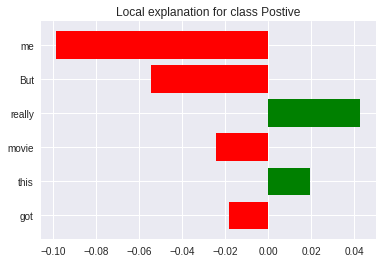

In [250]:
###  Sentence-4 --> 'But this movie really got to me.' [Pred-0;Actual-1]  ####

idx=92

#We are using top 6 features from document, which impacted the model prediction 
exp = explainer.explain_instance(test_df.Sentence[idx], pipe_nb.predict_proba, num_features=6)
print('Document id: %d' % idx)
print('Probability Distribution: [Negative Postive]:',pipe_nb.predict_proba([test_df.Sentence[idx]]))
print('Probability(Positive) =', pipe_nb.predict_proba([test_df.Sentence[idx]])[0,1])
print('True class: %s' % class_names[test_df.Polarity[idx]])
print(exp.as_list())
%matplotlib inline
fig = exp.as_pyplot_figure()

###
#  *** Conclusion *** - Explanation generated below shows, model predicted this sentence as 'negative'. 
#                       Again prediction for this sentence has been impacted by stop words like 'me', 'But', 'got'. 
#                       Interestingly, word 'movie' considered negative.
###

Document id: 12
Probability Distribution: [Negative Postive]: [[0.80120347 0.19879653]]
Probability(Positive) = 0.19879653442809891
True class: Postive
[('Not', -0.09563149257003534), ('not', -0.0938386725964851), ('right', 0.07418091585573386), ('too', -0.038547759109982836), ('but', -0.03642123310452276), ('just', 0.014925685170599216)]


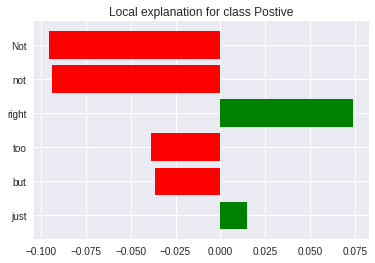

In [251]:
###  Sentence-5 --> 'Not too screamy not to masculine but just right.' [Pred-0;Actual-1]  ####

idx=12

#We are using top 6 features from document, which impacted the model prediction 
exp = explainer.explain_instance(test_df.Sentence[idx], pipe_nb.predict_proba, num_features=6)
print('Document id: %d' % idx)
print('Probability Distribution: [Negative Postive]:',pipe_nb.predict_proba([test_df.Sentence[idx]]))
print('Probability(Positive) =', pipe_nb.predict_proba([test_df.Sentence[idx]])[0,1])
print('True class: %s' % class_names[test_df.Polarity[idx]])
print(exp.as_list())
%matplotlib inline
fig = exp.as_pyplot_figure()

###
#  *** Conclusion *** - Explanation generated below shows, model predicted this sentence as 'negative'.  
#                       Model considered words like 'not', 'too', 'but' as negative, which are stop words, and heavily impacted prediction. 
###

# Question 2 (Optional): Sentiment Analysis via Deep ML

This question is optional and worth up to 5 extra credit marks.

Use deep learning (e.g., RNNs and variants, CNNs and variants, and/or transformers) to build a model on the same dataset and compare the results with the Shallow ML model.

You may train your own deep ML model (using, e.g., the keras library) or use a pre-trained deep ML model (using, e.g., the transformers library).

In [195]:
# Creating Embeddings using DistilBERT 
tokenizer = AutoTokenizer.from_pretrained('distilbert-base-uncased')

In [196]:
# Check longest token sequence in entire text
def checkForMaxTokenSeqInData(text_list, tokenizer_i):
  
    max_val = 0
    for sent in text_list:
        try:
            sent_tok_len = len(tokenizer_i.tokenize(sent))
            max_val = sent_tok_len if (sent_tok_len > max_val) else max_val
        except:
            pass
    
    print(f"The maximum amount of tokens in the dataset is {max_val}")
    return max_val

MAX_VAL = checkForMaxTokenSeqInData(X_train.to_list()+X_val.to_list(),tokenizer)

The maximum amount of tokens in the dataset is 84


In [197]:
def encode_text(tokenizer_i, text, max_text_length):

    # Encode the sentence
    encodedText = tokenizer_i(text,
                             max_length =max_text_length,
                            truncation=True, 
                            add_special_tokens=True, 
                            padding='max_length')
    return encodedText

train_encoding = encode_text(tokenizer, X_train.to_list(), MAX_VAL)
val_encoding = encode_text(tokenizer, X_val.to_list(), MAX_VAL)


###Build Model

In [198]:
from transformers import DistilBertTokenizer, TFDistilBertForSequenceClassification
def build_model(base_model, trainable=False, params={}):
    inputs = Input(shape = (params['max_seq_length'],),name='input_ids', dtype='int32')
    masks  = Input(shape = (params['max_seq_length'],),name='attention_mask', dtype='int32')

    base_model.trainable = trainable

    dbert_output = base_model(inputs, masks)[0]
    cls_token = dbert_output[:, 0, :]
    dropout_layer = Dropout(params['dropout_rate_1'])(cls_token)
    dense_layer = Dense(params['dense_layer_1_units'],activation='relu')(dropout_layer)
    dropout_layer = Dropout(params['dropout_rate_2'])(dense_layer)
    flatten = Flatten()(dropout_layer)
    probs = Dense(1, activation='sigmoid', name="output")(flatten)

    model = keras.Model(inputs=[inputs, masks], outputs=probs)
    model.summary()
    return model

MODEL_NAME= 'distilbert-base-uncased'

# Configure DistilBERT's initialization
config = DistilBertConfig(output_hidden_states=False)
                          
# The bare, pre-trained DistilBERT transformer model outputting raw hidden-states 
# and without any specific head on top.
dbert_model = TFDistilBertModel.from_pretrained('distilbert-base-uncased', config=config)
params={
        "dense_layer_1_units": 128,        
        "dropout_rate_1": 0.2,
	      "dense_layer_2_units": 32,
        "dropout_rate_2": 0.2,
        "regularizer_l2_rate":0.01,
        "max_seq_length":MAX_VAL
        }

model = build_model(dbert_model, trainable=False, params=params)

Some layers from the model checkpoint at distilbert-base-uncased were not used when initializing TFDistilBertModel: ['vocab_projector', 'vocab_transform', 'vocab_layer_norm', 'activation_13']
- This IS expected if you are initializing TFDistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFDistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
All the layers of TFDistilBertModel were initialized from the model checkpoint at distilbert-base-uncased.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFDistilBertModel for predictions without further training.


Model: "model_2"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_ids (InputLayer)         [(None, 84)]         0           []                               
                                                                                                  
 attention_mask (InputLayer)    [(None, 84)]         0           []                               
                                                                                                  
 tf_distil_bert_model_2 (TFDist  TFBaseModelOutput(l  66362880   ['input_ids[0][0]',              
 ilBertModel)                   ast_hidden_state=(N               'attention_mask[0][0]']         
                                one, 84, 768),                                                    
                                 hidden_states=None                                         

In [199]:
def compile_model(model, lr):

    optimizer = keras.optimizers.Adam(learning_rate=lr)
    loss = keras.losses.binary_crossentropy
    model.compile(optimizer=optimizer,
              loss=loss,
              metrics='accuracy')
    return model


model = compile_model(model, 0.002)

In [200]:
def train_model(model, model_inputs_and_masks_train, model_inputs_and_masks_val,
    y_train, y_val, batch_size, num_epochs):

    dataset_train = tf.data.Dataset.from_tensor_slices((dict(model_inputs_and_masks_train),y_train))
    dataset_val = tf.data.Dataset.from_tensor_slices((dict(model_inputs_and_masks_val),y_val))

    history = model.fit(dataset_train.shuffle(len(dataset_train)).batch(batch_size), 
                    epochs=num_epochs, 
                    batch_size=batch_size,
                    validation_data=dataset_val.shuffle(len(dataset_val)).batch(batch_size), 
                    verbose=1)
    
    return model, history, dataset_val

tf.config.run_functions_eagerly(True) #use function decorator in TF 2.0, please enable run function eagerly by using below line after importing TensorFlow
model, history, val_dataset = train_model(model, train_encoding, val_encoding, y_train, y_val, batch_size=32, num_epochs=10)

Epoch 1/10
57/57 [==============================] - 22s 386ms/step - loss: 0.4911 - accuracy: 0.7528 - val_loss: 0.3254 - val_accuracy: 0.8617
Epoch 2/10
57/57 [==============================] - 15s 269ms/step - loss: 0.3425 - accuracy: 0.8522 - val_loss: 0.2706 - val_accuracy: 0.9017
Epoch 3/10
57/57 [==============================] - 15s 267ms/step - loss: 0.3123 - accuracy: 0.8722 - val_loss: 0.2564 - val_accuracy: 0.8983
Epoch 4/10
57/57 [==============================] - 15s 266ms/step - loss: 0.3071 - accuracy: 0.8733 - val_loss: 0.2595 - val_accuracy: 0.9017
Epoch 5/10
57/57 [==============================] - 15s 269ms/step - loss: 0.2909 - accuracy: 0.8767 - val_loss: 0.2520 - val_accuracy: 0.9000
Epoch 6/10
57/57 [==============================] - 16s 275ms/step - loss: 0.2747 - accuracy: 0.8889 - val_loss: 0.2904 - val_accuracy: 0.8833
Epoch 7/10
57/57 [==============================] - 15s 268ms/step - loss: 0.2800 - accuracy: 0.8817 - val_loss: 0.2493 - val_accuracy: 0.9083

### Model Evaluation

In [201]:
y_test

0      1
1      1
2      1
3      1
4      1
      ..
595    0
596    0
597    0
598    0
599    0
Name: Polarity, Length: 600, dtype: int64

In [202]:
# Test data - Tensor Conversion
def predict_labels(model, dataset):
  output = model.predict(dataset.batch(1)) 
  predicted_labels = (output>0.50)
  return output, predicted_labels

test_encoding = encode_text(tokenizer, test_df['Sentence_clean'].to_list(), MAX_VAL)
dataset_test = tf.data.Dataset.from_tensor_slices((dict(test_encoding)))
predicted_prob, predicted_labels = predict_labels(model, dataset_test)
#print("predicted_prob:",predicted_prob)
#print("predicted_labels:",predicted_labels)

In [203]:
print(classification_report(y_test, predicted_labels))
fpr, tpr, thresh = roc_curve(y_test, predicted_prob[:], pos_label=1)

# roc curve for tpr = fpr 
random_probs = [0 for i in range(len(y_test))]
p_fpr, p_tpr, _ = roc_curve(y_test, random_probs, pos_label=1)

auc_score_nn = roc_auc_score(y_test, predicted_prob[:])

print('auc_score_test_nn:',auc_score_nn)
print('accuracy_nn %s' % accuracy_score(predicted_labels, y_test))

              precision    recall  f1-score   support

           0       0.83      0.79      0.81       287
           1       0.81      0.85      0.83       313

    accuracy                           0.82       600
   macro avg       0.82      0.82      0.82       600
weighted avg       0.82      0.82      0.82       600

auc_score_test_nn: 0.9014816711380258
accuracy_nn 0.82


##Deep ML - Conclusion
With very basic transfer learning DistilBERT model, our model accuracy raised to 82%. So, its the best model so far.